<a href="https://colab.research.google.com/github/sinheechan/ML/blob/main/%5BDataset%5D_%EC%9C%84%EC%8A%A4%EC%BD%98%EC%8B%A0_%EC%9C%A0%EB%B0%A9%EC%95%94_%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# XGboost 실습

## 1. 초기 설정

In [1]:
import xgboost as xgb
from xgboost import plot_importance
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import warnings

## 2. 데이터 불러오기

In [2]:
dataset = load_breast_cancer()

In [3]:
dataset

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

## 3. EDA

### 3.1 데이터 가공

- 내제되어 있는 데이터 셋은 독립변수에 해당하는 data와 종속변수에 해당하는 target이 별개로 되어져 있기 때문에 각각 features와 labels로 저장해준다.

In [4]:
features = dataset.data
labels = dataset.target

- feature_names는 인덱스의 값을 갖고 있으므로 data값과 일치시켜서 데이터 프레임으로 변환한다.

In [5]:
cancer_df = pd.DataFrame(data = features, columns = dataset.feature_names)

- target 값을 가지는 칼럼을 생성해준다.

In [6]:
cancer_df['target'] = labels

### 3.2 데이터 탐색

In [7]:
cancer_df.shape

(569, 31)

In [8]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [9]:
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [10]:
print(dataset.target_names)
print(cancer_df['target'].value_counts())

['malignant' 'benign']
1    357
0    212
Name: target, dtype: int64


In [11]:
cancer_df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

- 악성종양인지 양성종양인지 예측하기 위한 변수인 target열의 value_counts()를 확인해 보았다.
  - 결론적으로, 1(악성)값이 357개, 0(양성)값이 212개로 분포되어져 있고, int형인 것을 확인할 수 있다.

- 또한 결측치가 존재하는 열이 없다. 또, 30개의 float(실수)형과 1개의 int(정수)형이 존재한다.

## 4. 머신러닝 적용하기

- train / validation / test 데이터 셋으로 나누기

- 모델을 학습하기 전에 원본 데이터 셋을 train, validation, test 데이터 셋으로 분할하였다.

- 여기서 검증용 데이터를 분리한 이유는, XGBoost가 제공하는 기능인 검증 성능 평가와 조기중단을 수행하기 위해서이다.

In [22]:
X_features = cancer_df.iloc[:,:-1]
y_label = cancer_df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X_features, y_label, test_size = 0.2, random_state = 156)

X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size = 0.1, random_state = 156)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

print("-" * 100)

print(X_tr.shape, X_val.shape)
print(y_tr.shape, y_val.shape)

(455, 30) (114, 30)
(455,) (114,)
----------------------------------------------------------------------------------------------------
(409, 30) (46, 30)
(409,) (46,)


- XG Boost는 pandas, numpy 형태로 되어 있는 데이터를 DMatrix 형태로 변환하여 사용하기 때문에 해당 DMatrix로 변환해준다.
- DMatrix 형태로 변환해주기 위해서는 data와 label 값을 지정해 주어야 한다.

In [13]:
dtr= xgb.DMatrix(data = X_tr, label = y_tr)
dval = xgb.DMatrix(data = X_val, label = y_val)
dtest = xgb.DMatrix(data = X_test, label = y_test)

XGBoost 하이퍼 파라미터 지정하기
- max_depth : 트리의 최대 깊이

- eta : learning_rate (학습률)

- objective : 목적함수 , 이진분류이기 때문에 binary:logistic으로 지정

- eval_metric : 성능평가 지표 (logloss) , 분류 데이터에서는 주로 error과 logloss 사

- num_rounds : 부스팅 반복 횟수 (조기중단 기능에 따라서 지정된 횟수로 반복을 하지 않고 중간에 빠져나올 수 있음)

- XG Boost의 하이퍼 파라미터를 지정한다.

In [14]:
params = {'max_depth' : 3,
          'eta' : 0.05,
          'objective' : 'binary:logistic',
          'eval_metric':'logloss'}

num_rounds = 400

- XGBoost의 조기 중단 성능 평가는 주로 별도의 검증 데이터 세트를 이용한다. (위에서 검증 데이터를 나누어준 이유이기도 하다.)

- 조기 중단 파라미터는 early_stopping_rounds이고, 여기서는 50으로 설정해주었다.

- 조기중단을 실행하기 위해서는 반드시 평가용 데이터 세트 지정과 eval_metric을 함께 설정해주어야 한다
- 평가용 데이터 세트는 아래 코드와 같이 학습과 평가용 데이터 세트를 명시하는 개별 튜플을 가지는 리스트 형태로 설정해야 한다.

In [15]:
# 학습 데이터 셋은 'train' , 평가용 데이터 셋은 'eval'로 명시한다.

eval_list = [(dtr,'train'),(dval,'eval')]
# 또는 eval_list = [(dval,'eval')]만 명기해도 무방

# 하이퍼 파라미터와 early_stopping 파라미터를 train() 함수의 파라미터로 전달
xgb_model = xgb.train(params = params, dtrain = dtr, num_boost_round = num_rounds,
                      early_stopping_rounds = 50, evals = eval_list)

[0]	train-logloss:0.62480	eval-logloss:0.63104
[1]	train-logloss:0.58674	eval-logloss:0.60478
[2]	train-logloss:0.55226	eval-logloss:0.58223
[3]	train-logloss:0.52086	eval-logloss:0.56184
[4]	train-logloss:0.49192	eval-logloss:0.54118
[5]	train-logloss:0.46537	eval-logloss:0.52223
[6]	train-logloss:0.44029	eval-logloss:0.50287
[7]	train-logloss:0.41666	eval-logloss:0.48620
[8]	train-logloss:0.39525	eval-logloss:0.46974
[9]	train-logloss:0.37542	eval-logloss:0.45497
[10]	train-logloss:0.35701	eval-logloss:0.44131
[11]	train-logloss:0.33982	eval-logloss:0.43134
[12]	train-logloss:0.32297	eval-logloss:0.41972
[13]	train-logloss:0.30725	eval-logloss:0.40902
[14]	train-logloss:0.29327	eval-logloss:0.39883
[15]	train-logloss:0.27946	eval-logloss:0.38968
[16]	train-logloss:0.26691	eval-logloss:0.38150
[17]	train-logloss:0.25473	eval-logloss:0.37368
[18]	train-logloss:0.24385	eval-logloss:0.36666
[19]	train-logloss:0.23338	eval-logloss:0.35994
[20]	train-logloss:0.22320	eval-logloss:0.35374
[2

- 위의 결과를 통해서 train-logloss와 eval-logloss가 지속적으로 감소하고 있음을 알 수 있다.
- 또한, num_boost_rounds 파라미터를 400으로 지정했음에도 불구하고 176에서 조기중단한 것을 볼 수 있다.
- 이는, 126번째 반복에서 0.24516로 가장 낮고 (logloss 값이 작을수록 모델의 성능이 좋다는 의미), 이후로 더 향상된 값이 50회 반복한 결과 없기 때문에 조기 중단 기능이 수행된 것이다.

- xgboost를 이용해 학습을 완료했기에 이를 테스트 데이터 세트에서 예측을 수행해 보았다.
- 파이썬 래퍼 XGBoost는 train() 함수를 호출해 학습이 완료된 모델 객체를 반환하게 되는데, 이 모델 객체는 예측을 위해 predict() 메서드를 이용한다.

- 여기서 사이킷런 래퍼 XGBoost의 predict() 메서드는 예측결과를 클래스로 반환하는데에 반해,
- 파이썬 래퍼 XGBoost의 predict() 메서드는 예측 결과값이 아닌 예측 결과를 추정할 수 있는 확률 값을 반환한다.

In [16]:
pred_probs = xgb_model.predict(dtest)
print('predict() 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨')
# 소수점 3번째까지만 보여주는 코드
print(np.round(pred_probs[:10],3))

# 예측 확률이 0.5보다 크면 1, 그렇지 않으면 0으로 예측값을 결정하여 list 객체인 preds에 저장됨
preds = [1 if x > 0.5 else 0 for x in pred_probs]
print('예측값 10개만 표시 :', preds[:10])

predict() 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨
[0.938 0.004 0.75  0.049 0.98  1.    0.999 0.999 0.998 0.001]
예측값 10개만 표시 : [1, 0, 1, 0, 1, 1, 1, 1, 1, 0]


- 다음으로 이렇게 예측된 preds와 실제 값인 y_test를 인자로 입력하여 정확도, 정밀도, 재현율을 구해보았다.

In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# 정확도, 정밀도, 재현율, 오차행렬을 출력해주는 함수 생성
def get_clf_eval(y_test, pred):
  confusion = confusion_matrix(y_test, pred)
  accuracy = accuracy_score(y_test, pred)
  precision = precision_score(y_test, pred)
  recall = recall_score(y_test, pred)
  print('오차행렬')
  print(confusion)
  print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}'.format(accuracy, precision, recall))


get_clf_eval(y_test,preds)

오차행렬
[[35  2]
 [ 2 75]]
정확도: 0.9649, 정밀도: 0.9740, 재현율: 0.9740


## 5. 변수 중요도 확인

- 마지막으로 xgboost의 내장된 시각화 기능을 수행하여 변수 중요도를 확인해 보았다.

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

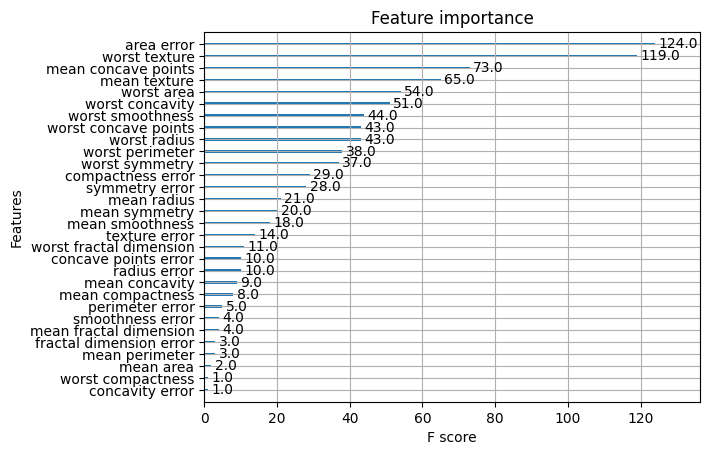

In [20]:
plot_importance(xgb_model)

# Light GBM 실습

## 1. 초기 설정

In [17]:
from lightgbm import LGBMClassifier

import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

## 2. 데이터 불러오기

- 데이터셋을 불러온다.

In [12]:
dataset = load_breast_cancer()

- 데이터셋을 가공한다.

In [18]:
cancer_df = pd.DataFrame(data=dataset.data, columns=dataset.feature_names)

cancer_df['target']= dataset.target

X_features = cancer_df.iloc[:, :-1]
y_label = cancer_df.iloc[:, -1]

## 3. 머신러닝 적용하기

### 3.1 데이터셋 분할

- 전체 데이터 중 80%는 학습용 데이터, 20%는 테스트용 데이터 추출한다.

In [19]:
X_train, X_test, y_train, y_test=train_test_split(X_features, y_label, test_size=0.2, random_state=2024 )

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(455, 30) (455,)
(114, 30) (114,)


- 위에서 만든 X_train, y_train을 다시 쪼개서 90%는 학습과 10%는 검증용 데이터로 분리한다.


In [21]:
X_tr, X_val, y_tr, y_val= train_test_split(X_train, y_train, test_size=0.1, random_state=2024 )

- 앞서 XGBoost와 동일하게 n_estimators는 400으로 설정한다.

In [22]:
lgbm_wrapper = LGBMClassifier(n_estimators=1000, learning_rate=0.05)

- LightGBM도 XGBoost와 동일하게 조기 중단 수행 가능한 코드를 입력한다.

In [23]:
evals = [(X_tr, y_tr), (X_val, y_val)]

lgbm_wrapper.fit(X_tr, y_tr, eval_metric="logloss", eval_set=evals) #early_stopping_rounds=50, verbose=True
preds = lgbm_wrapper.predict(X_test)
pred_proba = lgbm_wrapper.predict_proba(X_test)[:, 1]

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 259, number of negative: 150
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000449 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4092
[LightGBM] [Info] Number of data points in the train set: 409, number of used features: 30
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.633252 -> initscore=0.546193
[LightGBM] [Info] Start training from score 0.546193
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

### 3.2 성능 평가

- 분류 모델의 성능을 평가하고 출력하는 함수를 생성한다.

In [24]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

In [25]:
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

- 앞선 함수를 활용하여 y_test 데이터셋의 오차행렬과 평가지수를 출력한다.

In [26]:
get_clf_eval(y_test, preds, pred_proba)

오차 행렬
[[44  2]
 [ 0 68]]
정확도: 0.9825, 정밀도: 0.9714, 재현율: 1.0000,    F1: 0.9855, AUC:0.9987


### 3.3 중요도 시각화

- plot_importance( )를 이용하여 feature 중요도 시각화를 진행한다.

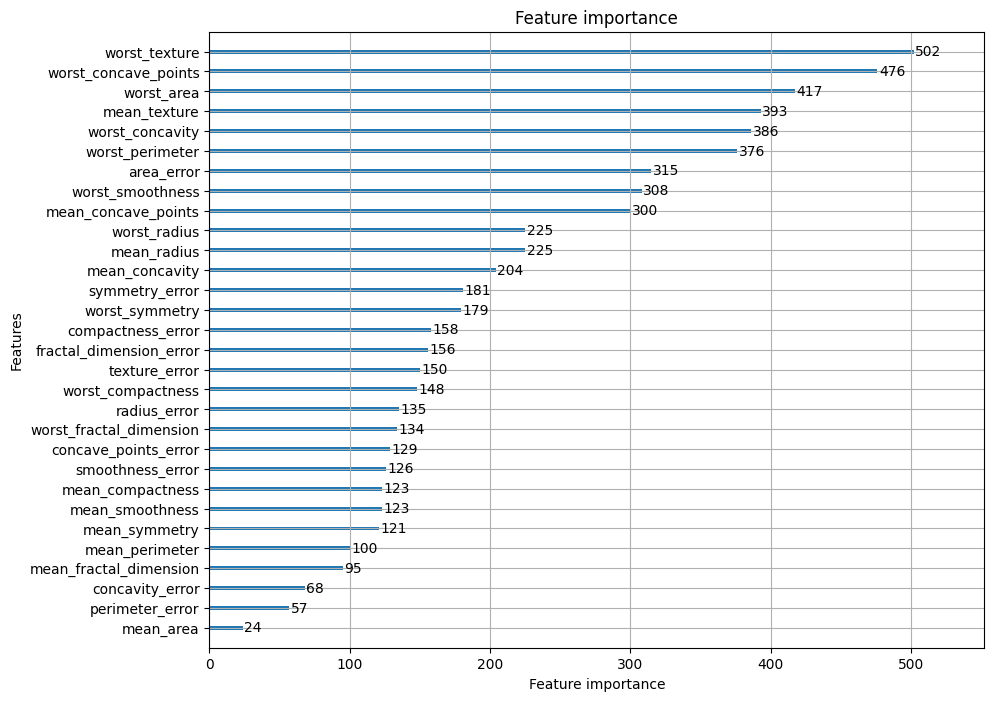

In [28]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 8))
plot_importance(lgbm_wrapper, ax=ax)
plt.savefig('lightgbm_feature_importance.tif', format='tif', dpi=300, bbox_inches='tight')

# Catboost

## 1. 초기 설정

In [29]:
!pip install -q catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 3.2 MB/s eta 0:00:00


## 2. 데이터 가공

- CatBoost는 Pool 객체를 통해 데이터를 처리한다.
- 학습 데이터와 테스트 데이터에 대해 Pool 객체를 생성한다.
  - X_tr은 학습용 특성 데이터
  -  y_tr은 학습용 레이블(타겟)
  - X_test는 테스트용 특성 데이터
  -  y_test는 테스트용 레이블(타겟)

In [30]:
from catboost import CatBoostClassifier, Pool

train_pool = Pool(X_tr, label = y_tr)
test_pool = Pool(X_test, label = y_test)

## 3. 모델 생성 및 테스트

- CatBoost 분류 모델이 주어진 매개변수를 기반으로 학습될 수 있도록 분류모델의 세팅값을 생성한다.

In [31]:
# 모델 생성
model = CatBoostClassifier(
    task_type='CPU',
    depth=6,
    learning_rate=0.01,
    n_estimators=2000)

model.fit(
    train_pool,
    eval_set = test_pool,
    verbose=500,
    plot=True )

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6759867	test: 0.6770628	best: 0.6770628 (0)	total: 72ms	remaining: 2m 23s
500:	learn: 0.0187567	test: 0.0673494	best: 0.0673494 (500)	total: 5.63s	remaining: 16.8s
1000:	learn: 0.0068569	test: 0.0545389	best: 0.0544978 (998)	total: 11.8s	remaining: 11.8s
1500:	learn: 0.0036802	test: 0.0497623	best: 0.0497623 (1500)	total: 17.8s	remaining: 5.91s
1999:	learn: 0.0026607	test: 0.0473806	best: 0.0473806 (1999)	total: 22.6s	remaining: 0us

bestTest = 0.04738063987
bestIteration = 1999



- 모델을 테스트한다.

In [32]:
cat_pred = model.predict(X_test)

In [33]:
accuracy = accuracy_score(y_test, cat_pred)
accuracy

0.9736842105263158

## 4. 시각화

<Axes: xlabel='target', ylabel='count'>

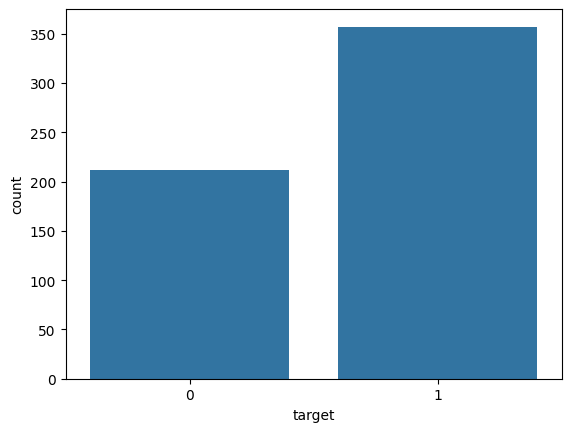

In [34]:
import seaborn as sns

sns.countplot(x = cancer_df['target'])

- SVM (Support Vector Machine)을 사용하여 분류 모델을 생성하고 테스트 데이터에 대해 정확도를 출력한다.

In [35]:
from sklearn import svm
from sklearn import metrics

model = svm.SVC(gamma='scale')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print('SVM %.2f' %(metrics.accuracy_score(y_pred, y_test) * 100))

SVM 90.35


- LightGBM 모델인 lgbm_wrapper의 특성 중요도를 계산하고 내림차순으로 정렬하여 출력한다.
- 각 특성의 중요도는 feature_importances_ 속성을 통해 제공된다.
- 즉, X_train은 모델이 학습된 특성 데이터의 열들을 나타내며 이에 해당하는 특성 중요도를 시리즈로 생성한 후, 인덱스를 X_train.columns로 설정하여 각 특성에 대응하도록 만들고 마지막에 내림차순으로 정렬하여 출력한다.

- 이 코드는 학습된 LightGBM 모델에서 각 특성의 중요도를 확인하여 모델의 예측에 영향을 미치는 특성을 파악할 수 있도록 도와준다.

In [37]:
features = pd.Series(lgbm_wrapper.feature_importances_, index = X_train.columns).sort_values(ascending=False) # 내림차순

top_5 = features.keys()[:5]
print(top_5)

Index(['worst texture', 'worst concave points', 'worst area', 'mean texture',
       'worst concavity'],
      dtype='object')


- SVM (Support Vector Machine)을 사용하여 특성 중요도가 높은 상위 5개의 특성만을 사용하여 분류 모델을 생성하고 테스트 데이터에 대해 정확도를 출력한다.

In [38]:
model = svm.SVC(gamma='scale')
model.fit(X_train[top_5], y_train)

y_pred = model.predict(X_test[top_5])
print('SVM %.2f(Top5)' %(metrics.accuracy_score(y_pred, y_test) * 100))

SVM 90.35(Top5)


- SVM 모델을 KFold 교차검증을 사용하여 평가한다.

In [39]:
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
model = svm.SVC(gamma='scale')

cv = KFold(n_splits=5, random_state=2024, shuffle=True)
accs = cross_val_score(model, cancer_df[top_5], cancer_df.target, cv=cv)
print(accs)
print('평균:', np.mean(accs))

[0.90350877 0.94736842 0.93859649 0.87719298 0.90265487]
평균: 0.9138643067846608


- MinMaxScaler를 사용하여 데이터를 표준화한 후, SVM 모델을 KFold 교차검증을 사용하여 평가한다.

In [40]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1)) # 표준화
scaled_data = scaler.fit_transform(cancer_df[top_5])

models = {
    'SVM' : svm.SVC(gamma='scale')
}
cv = KFold(n_splits=5, random_state=2024, shuffle=True)
for name, model in models.items():
  score = cross_val_predict(model, scaled_data, cancer_df['target'], cv=cv)
print('%s: %.2f%%'% (name, np.mean(score) * 100))

SVM: 63.80%
